In [27]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bases import linear, polynomial_1d, polynomial, sinusoidal_1d, sinusoidal, radial
from metrics import MSE
from surrogate_model import SurrogateModel
from error_estimate import bootstrap_sets, bootstrap_estimate, leave_one_out_bootstrap_estimate, bootstrap_632_estimate

In [2]:
plots_per_row = 3
w_decay       = 0.5

def regression_plot(bases_sets, df):
    X = df[df.columns.drop(['y'])].to_numpy()
    y = df['y'].to_numpy()
    (m, d) = X.shape

    X_M = np.amax(X, axis=0)
    X_m = np.amin(X, axis=0)

    y_M = np.amax(y)
    y_m = np.amin(y)

    plot_rows = max(2, len(bases_sets) // plots_per_row + bool(len(bases_sets) % plots_per_row))
    figure, axis = plt.subplots(plot_rows, plots_per_row, figsize=(6 * plots_per_row, 6 * plot_rows))

    for idx, bases_set in enumerate(bases_sets):
        axis[idx // plots_per_row, idx % plots_per_row].set_ylim([y_m - 10.0, y_M + 10.0])
        axis[idx // plots_per_row, idx % plots_per_row].scatter(X, y)

        model = SurrogateModel(bases_set, w_decay)
        model.fit(X, y)

        if d == 1:
            Xp = np.arange(X_m - 5.0, X_M + 5.0, 0.1)
            yp = model.predict(Xp.reshape(-1, 1))
            axis[idx // plots_per_row, idx % plots_per_row].plot(Xp, yp, c='red')

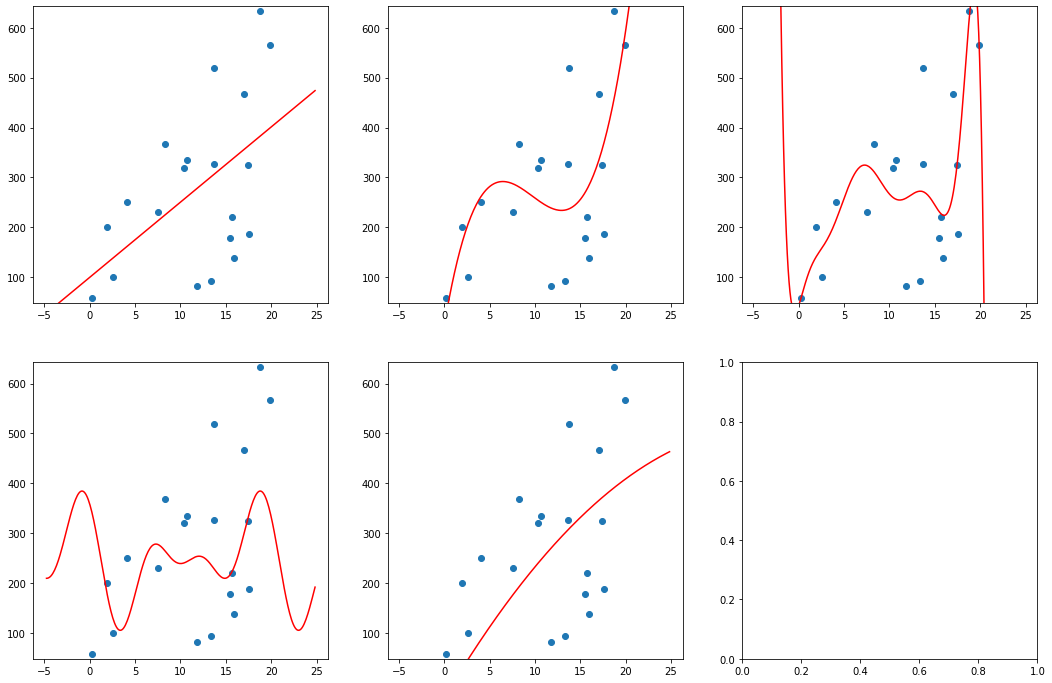

In [38]:
# Create data: poly (k = 1)

m_0 = 10
d_0 = 1
v_0 = 5.0

w = (np.random.random(d_0 + 1) - 0.5) *np.array([10.0, 50.0])

X_0 = np.array([np.random.random(d_0) * 20.0 for _ in range(m_0)])
y_0 = np.array([w[0] + sum([w[i + 1] * x[i] for i in range(d_0)]) for x in X_0]) + (np.random.random(m_0) - 0.5) * v_0 * sum(w[1:]) * math.sqrt(m_0)

a = np.amin(X_0, axis=0)
b = np.amax(X_0, axis=0)

df_0 = pd.DataFrame()
df_0[['x' + str(i) for i in range(d_0)]] = X_0
df_0['y'] = y_0
df_0.to_csv('./example_data/example_0.csv', index=False)

bss = [
    linear(1), 
    polynomial(1, 3), 
    polynomial(1, 9),
    sinusoidal(1, 6, a, b),
    radial(lambda r: r * r, [[2, 2], [0, 0]])
]
regression_plot(bss, df_0)